# Chapter 6 - exercise 2: Mushroom

## Cho dữ liệu mushroom trong tập tin mushrooms.csv chứa thông tin của các mẫu nấm, nấm ăn được và không ăn được. 

## Yêu cầu: Áp dụng thuật toán decision tree để cho biết nấm ăn được hay nấm độc dựa trên các thông tin được cung cấp.

## Dữ liệu có thể tham khảo và download tại: https://www.kaggle.com/jnduli/decision-treeclassifier-for-mushroom-dataset/data (https://www.kaggle.com/jnduli/decision-tree-classifierfor-mushroom-dataset/data)

## Data Infromation Bộ dữ liệu chứa 23 thuộc tính. Thuộc tính "class" là class attribute: Attribute Information:
+ classes: edible=e, poisonous=p
+ cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
+ cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
+ cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y bruises: bruises=t,no=f
+ odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
+ gill-attachment: attached=a,descending=d,free=f,notched=n
+ gill-spacing: close=c,crowded=w,distant=d
+ gill-size: broad=b,narrow=n
+ gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
+ stalk-shape: enlarging=e,tapering=t
+ stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
+ stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
+ stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
+ stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y 
+ stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
+ veil-type: partial=p,universal=u
+ veil-color: brown=n,orange=o,white=w,yellow=y
+ ring-number: none=n,one=o,two=t
+ ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
+ spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
+ population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
+ habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Yêu cầu:
+ Đọc dữ liệu, tìm hiểu sơ bộ về dữ liệu. Chuẩn hóa dữ liệu nếu cần
+ Tạo X_train, X_test, y_train, y_test từ dữ liệu chuẩn hóa với tỷ lệ dữ liệu test là 0.3
+ Áp dụng Decision Tree, Tìm kết quả
+ Kiểm tra độ chính xác
+ Trực quan hóa Decision Tree
+ Đánh giá mô hình.
+ Ghi mô hình nếu mô hình phù hợp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
mushroom = pd.read_csv('Data/mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
mushroom['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [6]:
x = mushroom.drop('class', axis=1)
y = mushroom['class']

## <span style='color:yellow'> Build Decision Tree Classifier

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Accuracy score of Tree_Classifier on train set: 0.9978895532887795
Accuracy score of Tree_Classifier on test set: 0.9983593109105825


Confusion matrix:
       e     p
e  1232     4
p     0  1202


Classification report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1236
           p       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438




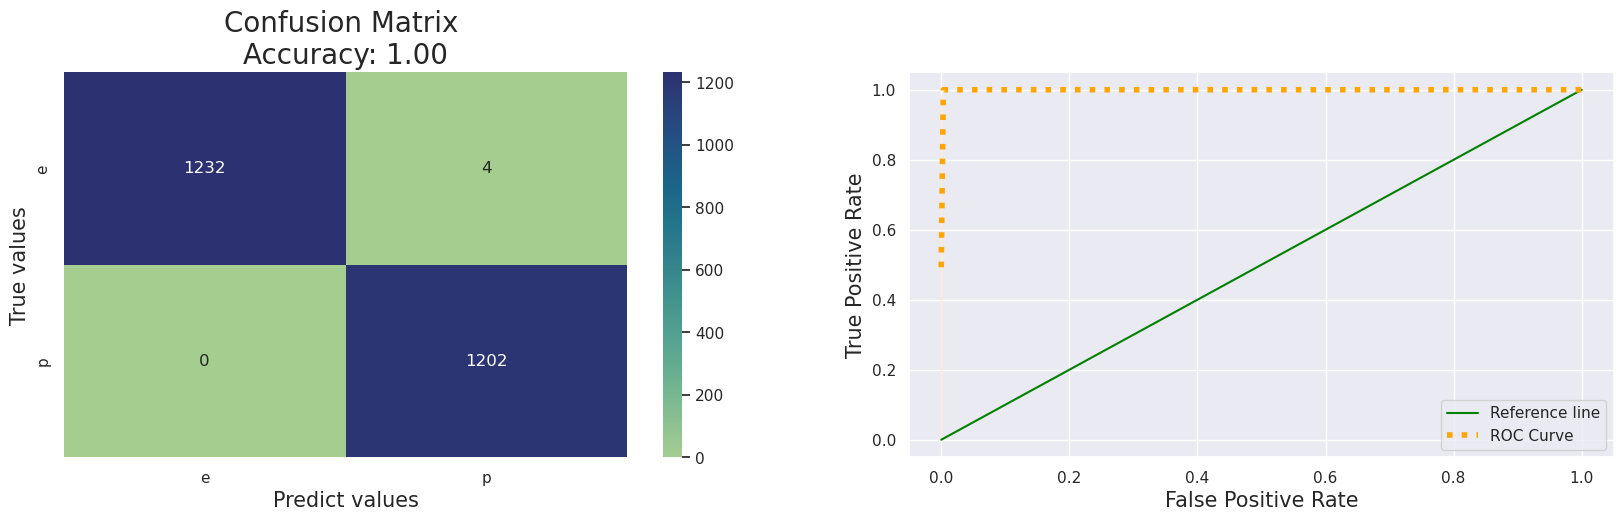

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline

treeC_pipe = Pipeline([
    ('OneHotEncoder', make_column_transformer( (OneHotEncoder(handle_unknown='ignore', drop='first'), x.columns), remainder='passthrough') ),
    ('Tree_Classifier', DecisionTreeClassifier(criterion='gini', min_samples_split=100))
])

treeC_pipe.fit(x_train, y_train)

y_test_pred = treeC_pipe.predict(x_test)
y_test_proba = treeC_pipe.predict_proba(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

print(f'Accuracy score of Tree_Classifier on train set: {accuracy_score(y_train, treeC_pipe.predict(x_train))}')
print(f'Accuracy score of Tree_Classifier on test set: {accuracy_score(y_test, y_test_pred)}')

labels = ['e', 'p']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\n\nConfusion matrix:\n {cm_df}')

print(f'\n\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')
print()

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label='p')

sbn.set_theme(style='darkgrid')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}', size=20)

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.show()

## <span style='color:yellow'> Visualize the tree

In [20]:
features = treeC_pipe.named_steps['OneHotEncoder'].get_feature_names_out()

features_cleaned = [feat.replace('onehotencoder__', '') for feat in features]
print(features_cleaned)

del features

['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f', 'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_c', 'stalk-color-above-ring_e', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_o', 'stalk-color-a

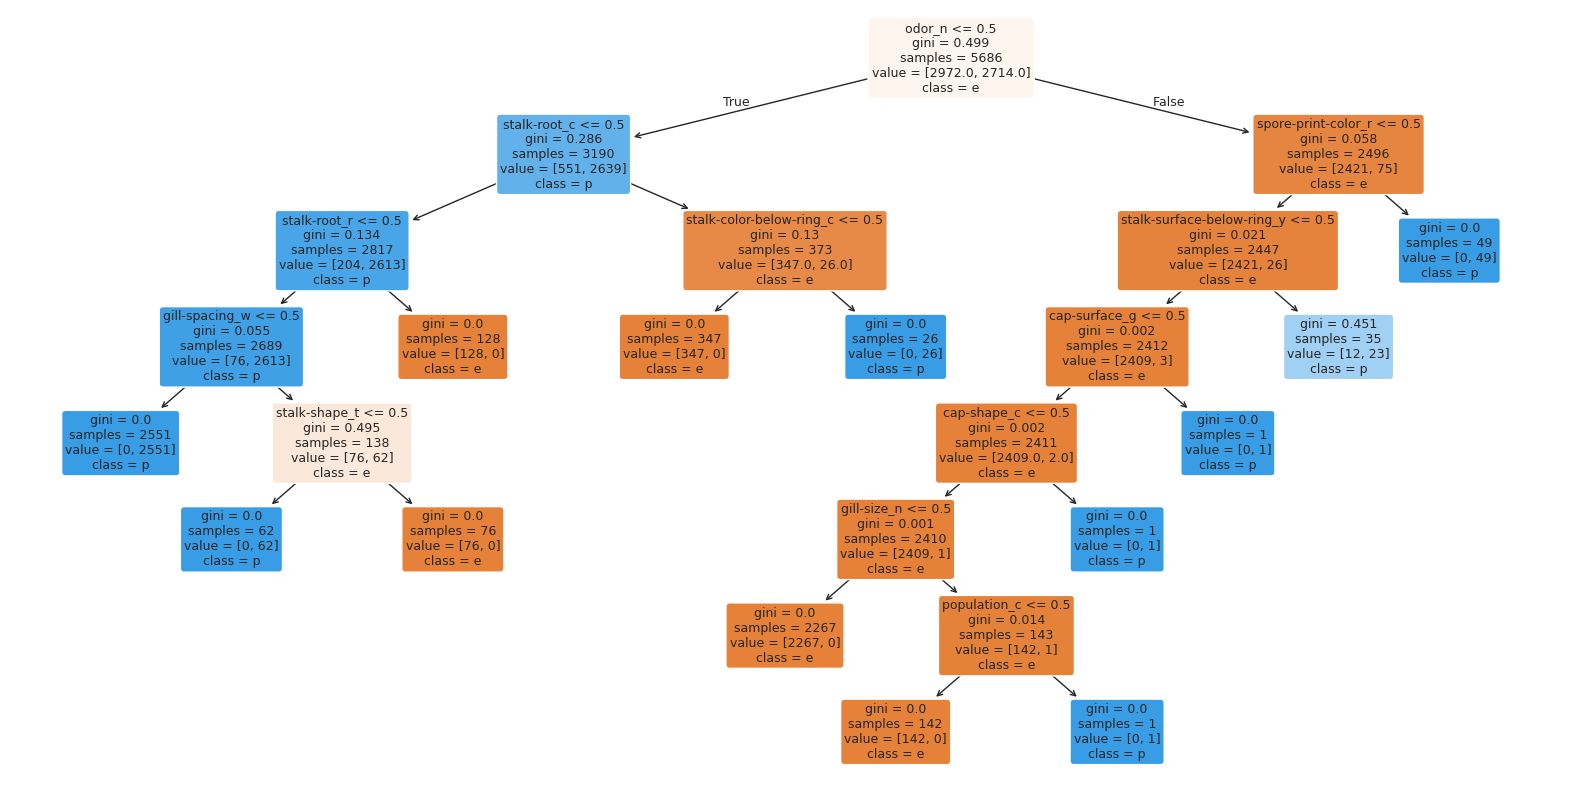

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(treeC_pipe.named_steps['Tree_Classifier'],
         filled = True,
         feature_names = features_cleaned,
         class_names = ['e','p'],
         rounded=True,                
          proportion=False)

plt.show()